<a href="https://colab.research.google.com/github/meet108/Interncarrer_Projects/blob/main/youtubers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Data Exploration**
*   Start by exploring the dataset to understand its structure and identify key variables.
* Check for missing data and outliers.





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/youtubers_df.csv')
data

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [4]:
data.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [5]:
data.dtypes

Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [7]:
data.describe()


,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [8]:
data.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [9]:
data.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [10]:
data= data.drop('Links',axis=1)
data

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0
...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0


In [11]:
data = data.drop_duplicates(subset=['Username'])
data.drop_duplicates(inplace=True)
data

<ipython-input-11-018a796225c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0
...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0


In [12]:
data.shape

(994, 8)

<Axes: >

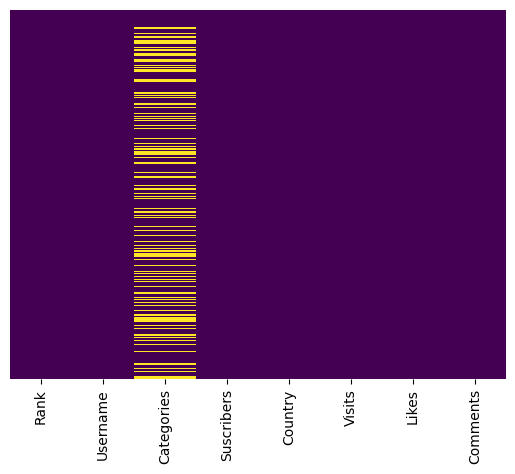

In [13]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
data = data.fillna(method="ffill")
data

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,4,SETIndia,Educación,162600000.0,India,15600.0,166.0,9.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0
...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Educación,11700000.0,Estados Unidos,397400.0,14000.0,124.0
996,997,Adaahqueen,Educación,11700000.0,India,1100000.0,92500.0,164.0
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0
998,999,PenMultiplex,Música y baile,11700000.0,India,14000.0,81.0,1.0


<Axes: >

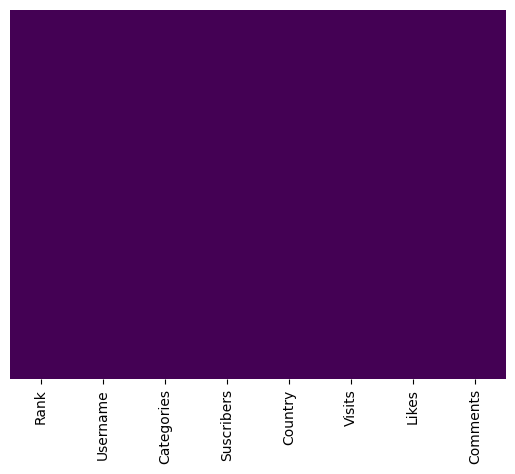

In [15]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**2.   Trend Analysis**
*  Identify trends among the top YouTube streamers. Which categories are the most popular?
* Is there a correlation between the number of subscribers and the number of likes or comments?





In [16]:
data.corr()

<ipython-input-16-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Rank,Suscribers,Visits,Likes,Comments
Rank,1.000000,-0.636772,-0.102388,-0.090573,-0.048749
Suscribers,-0.636772,1.000000,0.244950,0.211396,0.035985
Visits,-0.102388,0.244950,1.000000,0.950461,0.323924
Likes,-0.090573,0.211396,0.950461,1.000000,0.325785
Comments,-0.048749,0.035985,0.323924,0.325785,1.000000


In [17]:
data.mean()

<ipython-input-17-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


Rank          4.994789e+02
Suscribers    2.193038e+07
Visits        1.215601e+06
Likes         5.390243e+04
Comments      1.296157e+03
dtype: float64

In [18]:
data.std()

<ipython-input-18-a47ac8255c06>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std()


Rank          2.884943e+02
Suscribers    1.686876e+07
Visits        5.245076e+06
Likes         2.587976e+05
Comments      6.797964e+03
dtype: float64

In [19]:
data.value_counts()

Rank  Username                Categories           Suscribers   Country         Visits     Likes     Comments
1     tseries                 Música y baile       249500000.0  India           86200.0    2700.0    78.0        1
671   woodyandkleiny          Videojuegos, Humor   14600000.0   Estados Unidos  524900.0   35100.0   86.0        1
658   user-ts8yv9np7m         Películas, Humor     14700000.0   Unknown         38000.0    159.0     0.0         1
659   infobellskannadarhymes  Educación            14700000.0   Unknown         348300.0   8100.0    0.0         1
660   ZEE5                    Educación            14700000.0   India           255.5      8.0       0.0         1
                                                                                                                ..
338   EmiwayBantai            Música y baile       20500000.0   India           892800.0   95600.0   5500.0      1
339   PragatiVermaaShorts     Música y baile       20500000.0   India           28000

In [20]:
data['Categories'].mode()

0    Música y baile
Name: Categories, dtype: object

In [21]:
data['Categories'].max()

'Vlogs diarios'

In [22]:
data['Categories'].min()

'ASMR'

In [23]:
data['Categories'].value_counts().nlargest()

Música y baile               224
Películas, Animación          92
Noticias y Política           62
Música y baile, Películas     57
Vlogs diarios                 53
Name: Categories, dtype: int64

In [24]:
data['Categories'].value_counts().nsmallest()

Diseño/arte                           1
Comida y bebida, Salud y autoayuda    1
Música y baile, Juguetes              1
Viajes, Espectáculos                  1
ASMR                                  1
Name: Categories, dtype: int64

In [25]:
data['Username'].value_counts()

tseries                   1
woodyandkleiny            1
user-ts8yv9np7m           1
infobellskannadarhymes    1
ZEE5                      1
                         ..
EmiwayBantai              1
PragatiVermaaShorts       1
Cookieswirlc              1
gottalentglobal           1
OneindiaHindi             1
Name: Username, Length: 994, dtype: int64

In [26]:
data.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments
995,996,hamzymukbang,Educación,11700000.0,Estados Unidos,397400.0,14000.0,124.0
996,997,Adaahqueen,Educación,11700000.0,India,1100000.0,92500.0,164.0
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0
998,999,PenMultiplex,Música y baile,11700000.0,India,14000.0,81.0,1.0
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0


In [27]:
correlation = data['Suscribers'].corr(data['Likes'])
correlation

0.21139580409439598

In [28]:
correlation1 = data['Suscribers'].corr(data['Comments'])
correlation1

0.03598544645977234

In [29]:
top_streamers = data.sort_values(by='Suscribers',ascending=False).head()
top_streamers

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,4,SETIndia,Educación,162600000.0,India,15600.0,166.0,9.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0


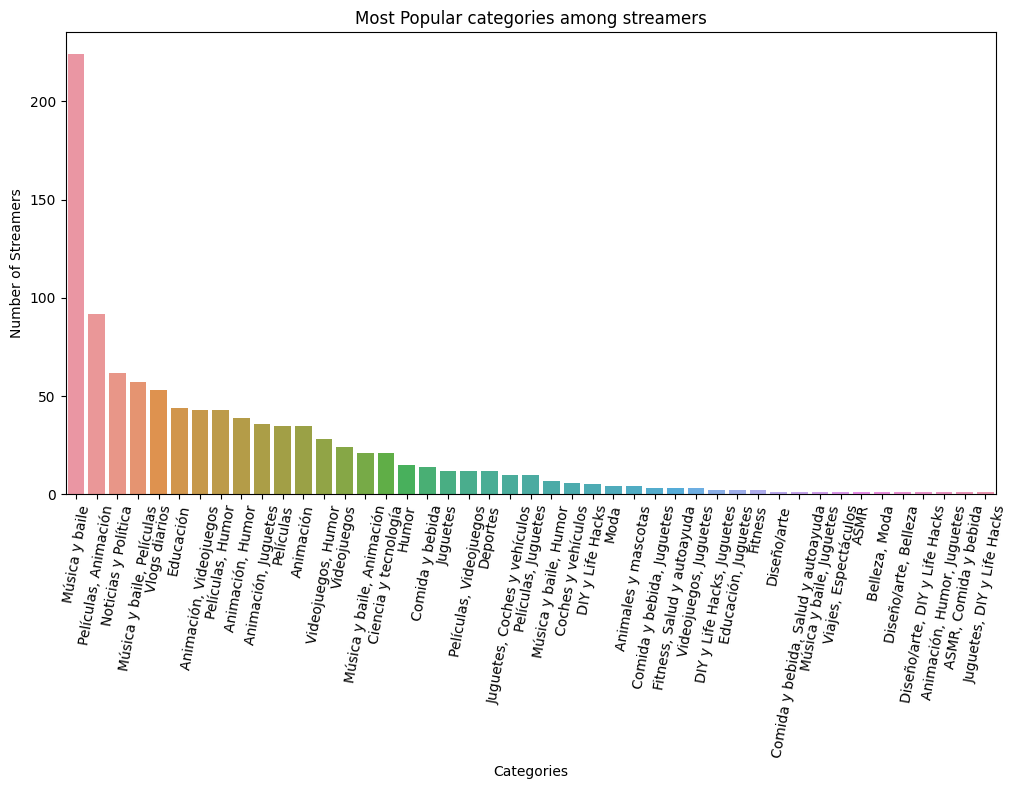

In [30]:
category_counts = data['Categories'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.index, y =category_counts.values)
plt.title("Most Popular categories among streamers")
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=80)
plt.show()

In [31]:
# Correlation Analysis:
correlation_likes = data['Suscribers'].corr(data['Likes'])
correlation_comments = data['Suscribers'].corr(data['Comments'])

print(f'Correlation between Subscribers and Likes: {correlation_likes:.3f}')
print(f'Correlation between Subscribers and Comments: {correlation_comments:.3f}')

Correlation between Subscribers and Likes: 0.211
Correlation between Subscribers and Comments: 0.036


In [32]:
#Visualize the correlations:
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# sns.scatterplot(data=top_streamers, y='Suscribers', x='Likes')
# plt.title('Subscribers vs. Likes')

# plt.subplot(1, 2, 2)
# sns.scatterplot(data=top_streamers, y='Suscribers', x='Comments')
# plt.title('Subscribers vs. Comments')

# plt.tight_layout()
# plt.show()

**3.Audience Study**

*   Analyze the distribution of streamers audiences by country.
*   Are there regional preferences for specific content categories?






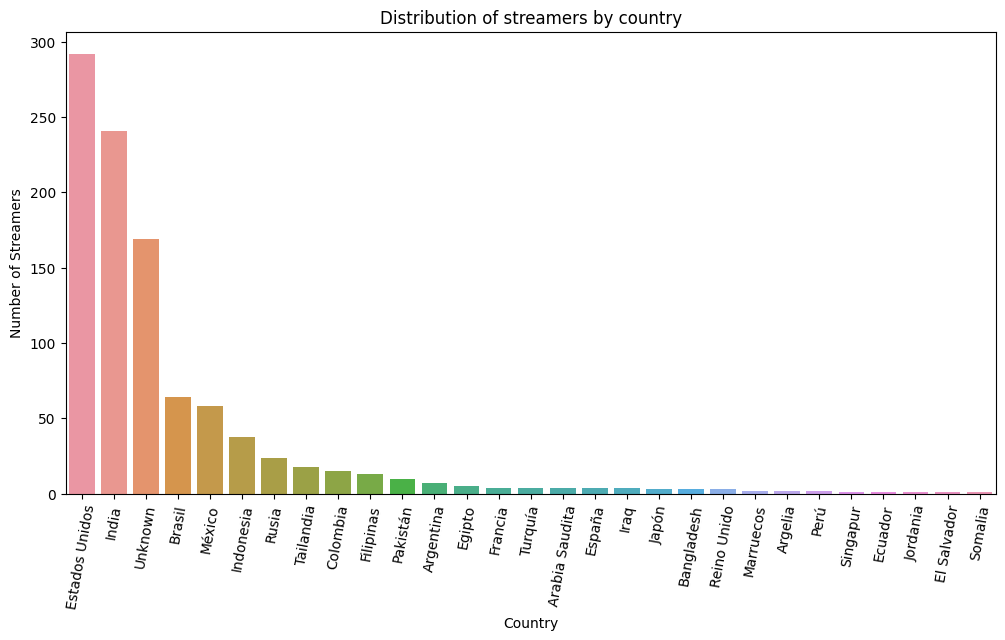

In [33]:
country_counts=data['Country'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.index, y =country_counts.values)
plt.title("Distribution of streamers by country")
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=80)
plt.show()

In [34]:
category_counts=data.groupby(['Country','Categories'])['Username'].count().unstack().fillna(0)


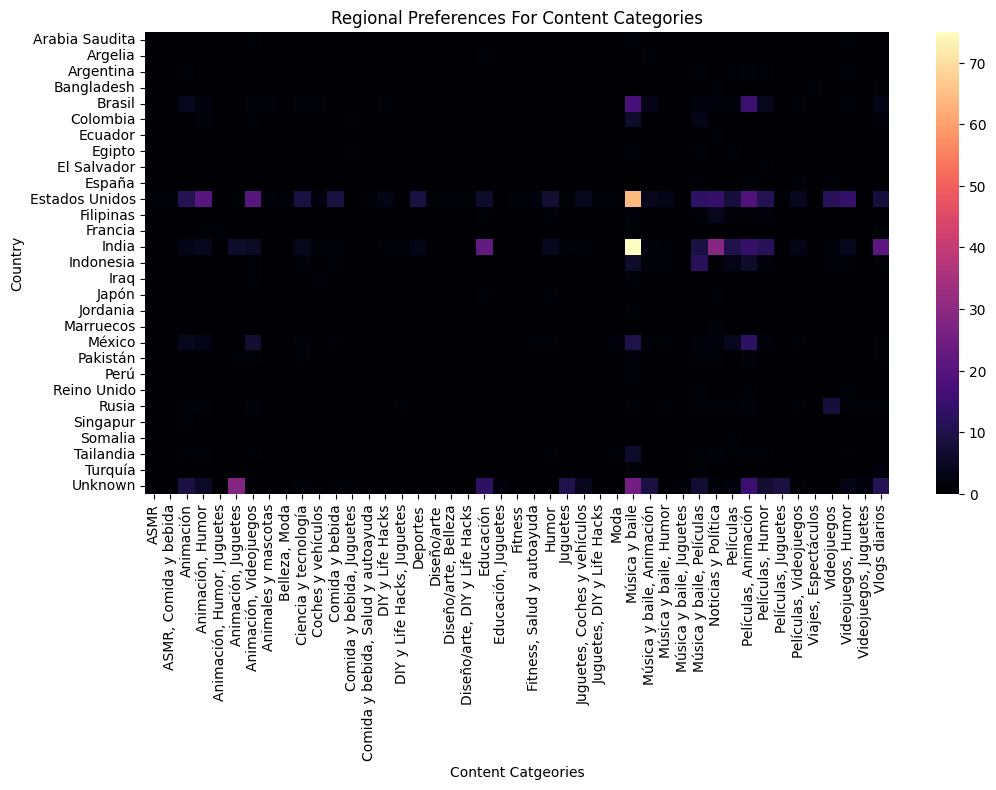

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(category_counts, cmap='magma')
plt.title('Regional Preferences For Content Categories')
plt.xlabel('Content Catgeories')
plt.ylabel('Country')
plt.show()

4. Performance Metrics:
- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?


In [36]:
average_subscribers = data['Suscribers'].mean()
average_visits = data['Visits'].mean()
average_likes = data['Likes'].mean()
average_comments = data['Comments'].mean()

print(f"Average Subscribers: {average_subscribers}")
print(f"Average Visits: {average_visits}")
print(f"Average Likes: {average_likes}")
print(f"Average Comments: {average_comments}")

Average Subscribers: 21930382.293762576
Average Visits: 1215600.921026157
Average Likes: 53902.42957746479
Average Comments: 1296.1569416498994


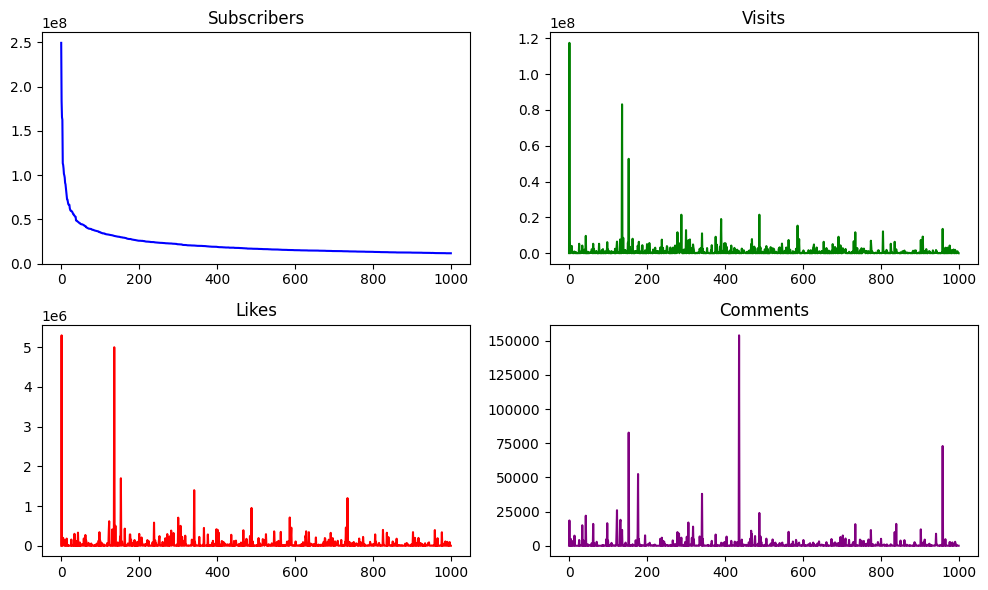

In [37]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

#Subscribers
plt.subplot(2, 2, 1)
plt.plot( data['Suscribers'], color='blue')
plt.title('Subscribers')

# Visits
plt.subplot(2, 2, 2)
plt.plot( data['Visits'], color='green')
plt.title('Visits')

#Likes
plt.subplot(2, 2, 3)
plt.plot( data['Likes'], color='red')
plt.title('Likes')

# Comments
plt.subplot(2, 2, 4)
plt.plot( data['Comments'], color='purple')
plt.title('Comments')

plt.tight_layout()
plt.show()


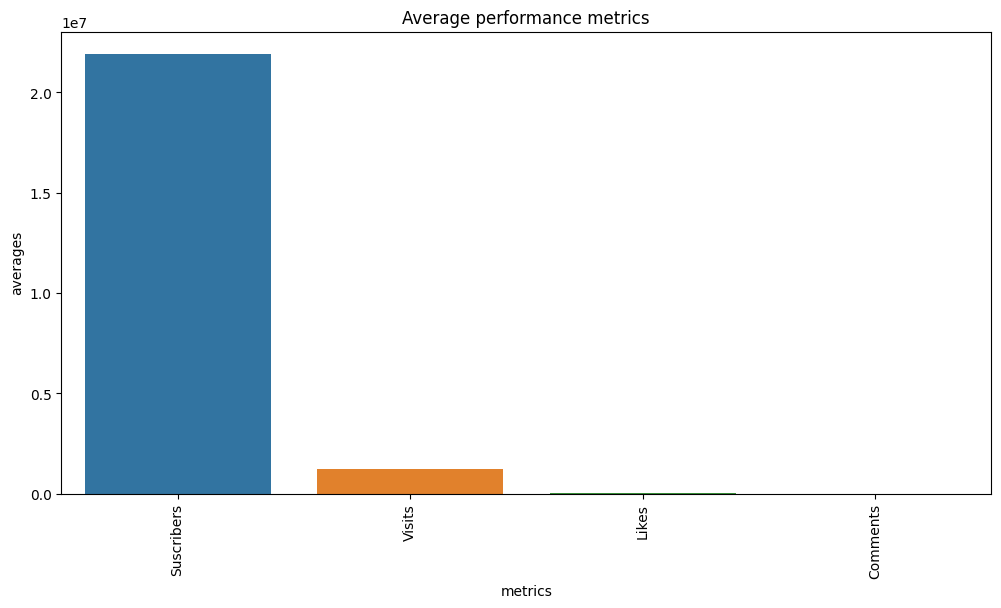

In [38]:
metrics = ['Suscribers','Visits','Likes','Comments']
averages = [average_subscribers, average_visits, average_likes, average_comments]
plt.figure(figsize=(12,6))
sns.barplot(x=metrics, y =averages)
plt.title("Average performance metrics")
plt.xlabel('metrics')
plt.ylabel('averages')
plt.xticks(rotation=90)
plt.show()

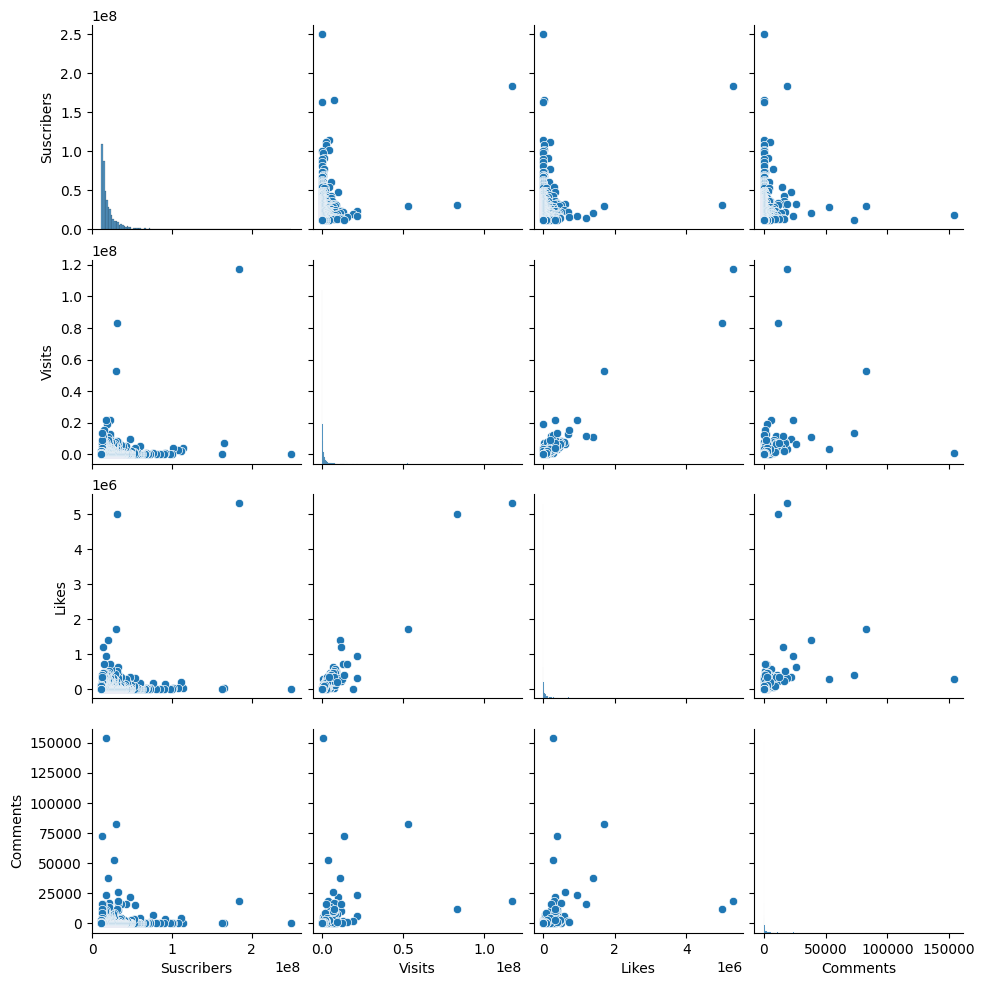

In [39]:
sns.pairplot(data[metrics])
plt.show()

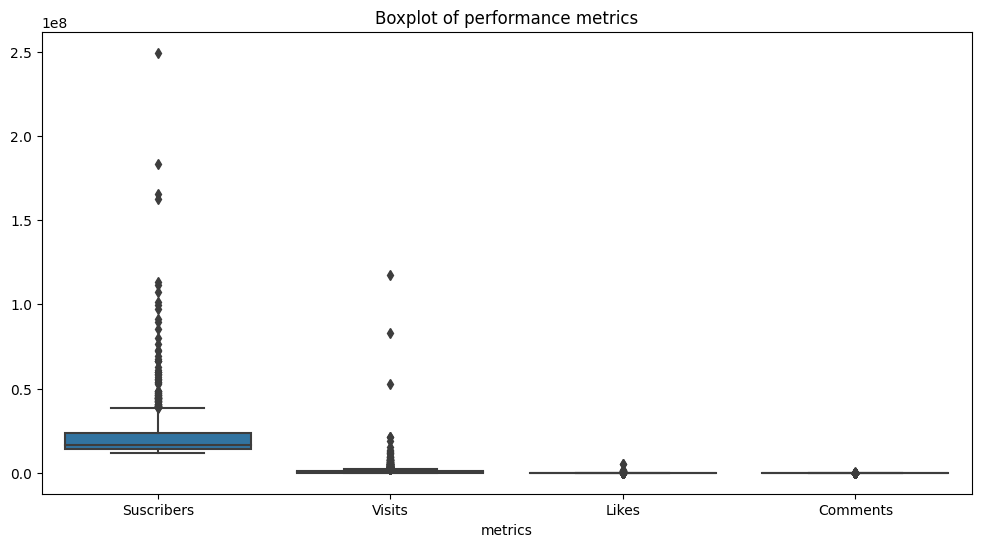

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data[metrics])
plt.title('Boxplot of performance metrics')
plt.xlabel('metrics')
plt.show()

In [41]:
#For example, to detect potential outliers in 'subscribers' column:
Q1 = data['Suscribers'].quantile(0.25)
Q3 = data['Suscribers'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Suscribers'] < lower_bound) | (data['Suscribers'] > upper_bound)]
print("Potential Outliers in Subscribers:")
print(outliers)

Potential Outliers in Subscribers:
    Rank         Username           Categories   Suscribers         Country  \
0      1          tseries       Música y baile  249500000.0           India   
1      2          MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2      3        CoComelon            Educación  165500000.0         Unknown   
3      4         SETIndia            Educación  162600000.0           India   
4      5    KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   
..   ...              ...                  ...          ...             ...   
74    75       gr6explode       Música y baile   39300000.0          Brasil   
75    76             TEDx       Música y baile   39100000.0  Estados Unidos   
76    77  GaaneSuneAnsune       Música y baile   39100000.0           India   
77    78           shfa-1        Vlogs diarios   39100000.0         Francia   
78    79      vladvaniki1     Películas, Humor   38700000.0         Unknown   

         Visits 

**5.Content Categories**
- Explore the distribution of content categories. Which categories have the highest number of
streamers?
- Are there specific categories with exceptional performance metrics?

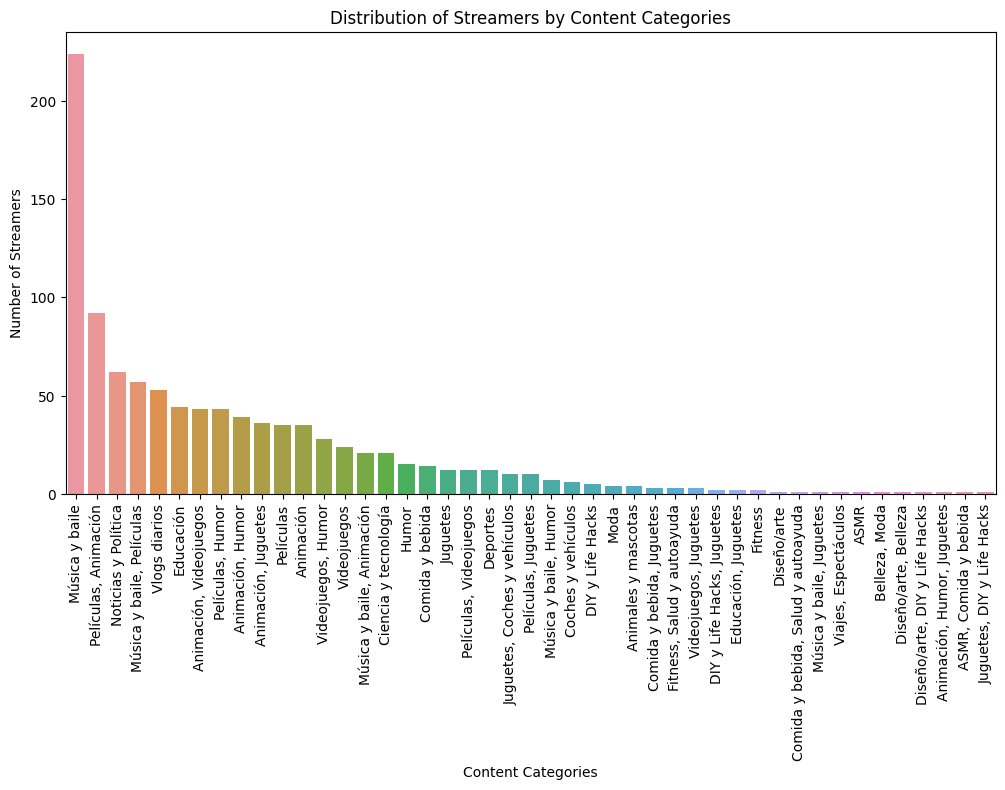

In [42]:
category_counts = data['Categories'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Streamers by Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

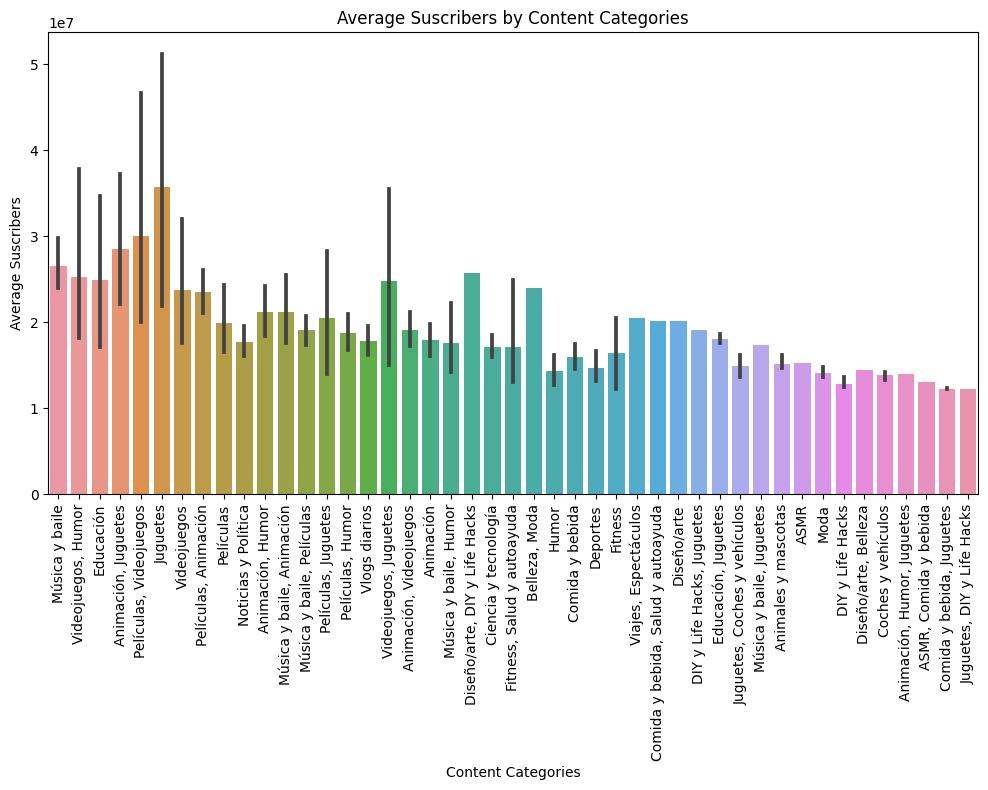

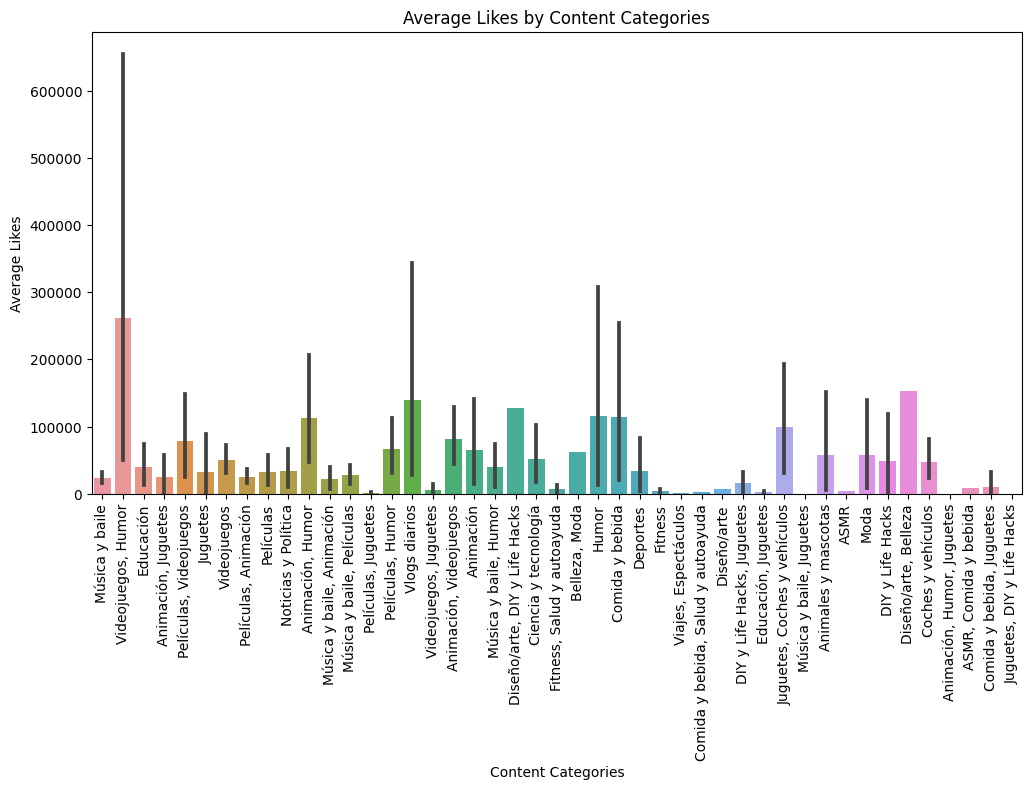

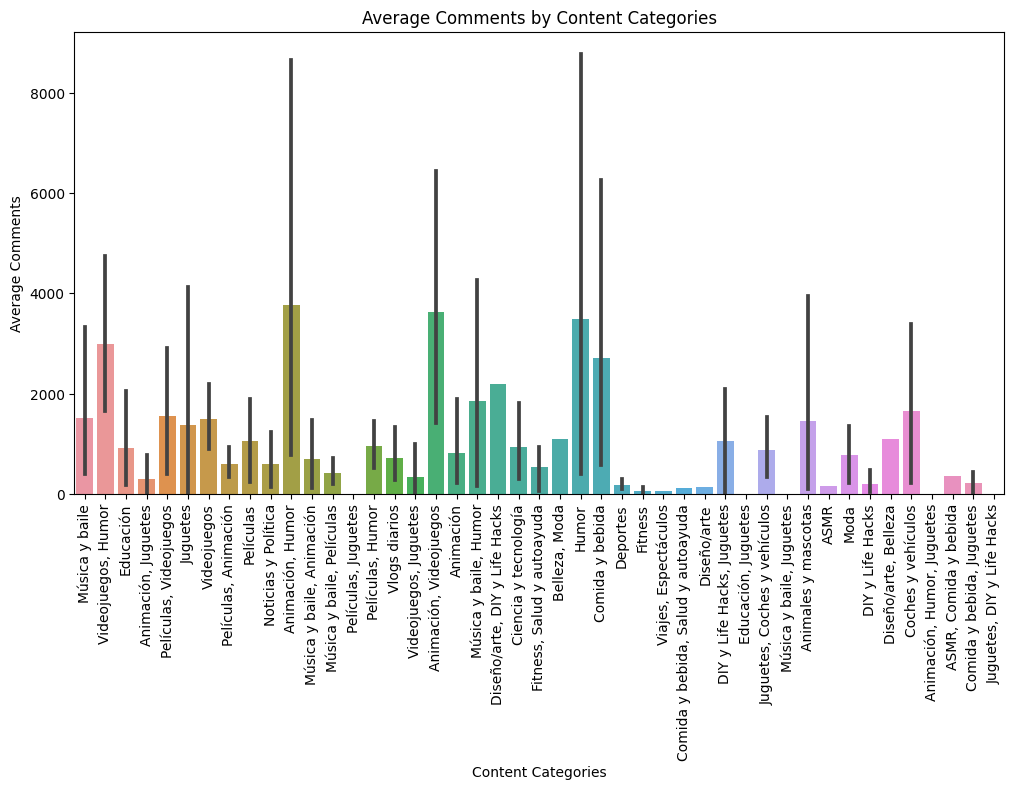

In [43]:
# Performance Metrics by Category
# Calculate and visualize average performance metrics by category
performance_metrics = ['Suscribers', 'Likes', 'Comments']

for metric in performance_metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x='Categories', y=metric)
    plt.title(f'Average {metric.capitalize()} by Content Categories')
    plt.xlabel('Content Categories')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xticks(rotation=90)
    plt.show()

In [44]:
# To identify exceptional categories, you can calculate z-scores or other statistical measures and filter based on thresholds.
# Here's an example using z-scores:

for metric in performance_metrics:
    z_scores = (data[metric] - data[metric].mean()) / data[metric].std()  # (z_score = (x - xbar/std))
    exceptional_categories = data[z_scores.abs() > 2]['Categories'].unique()
    print(f'Exceptional Categories for {metric.capitalize()}: {", ".join(exceptional_categories)}')

Exceptional Categories for Suscribers: Música y baile, Videojuegos, Humor, Educación, Animación, Juguetes, Películas, Videojuegos, Juguetes, Videojuegos, Películas, Animación, Películas, Noticias y Política
Exceptional Categories for Likes: Videojuegos, Humor, Animación, Videojuegos, Vlogs diarios, Animación, Humor, Películas, Humor, Humor, Comida y bebida, Noticias y Política, Animación
Exceptional Categories for Comments: Videojuegos, Humor, Música y baile, Animación, Humor, Juguetes, Animación, Videojuegos, Educación, Humor, Comida y bebida, Animación, Noticias y Política


**6.Brands and Collaborations**
- Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns.


In [45]:
# Define High Performance Metrics
high_subs_threshold = data['Suscribers'].quantile(0.75, interpolation="nearest")
high_likes_threshold = data['Likes'].quantile(0.75, interpolation="nearest")
high_comments_threshold = data['Comments'].quantile(0.75, interpolation="nearest")

In [46]:
# Identify High-Performance Streamers
data['HighPerformance'] = ((data['Suscribers'] >= high_subs_threshold) &
                           (data['Likes'] >= high_likes_threshold) &
                           (data['Comments'] >= high_comments_threshold))

In [47]:
# Analyze Engagement with Brands or Marketing Campaigns:
data['Engagement'] = data['Likes'] + data['Comments']

high_performance_engagement = data[data['HighPerformance']]['Engagement'].sum()
low_performance_engagement = data[~data['HighPerformance']]['Engagement'].sum()

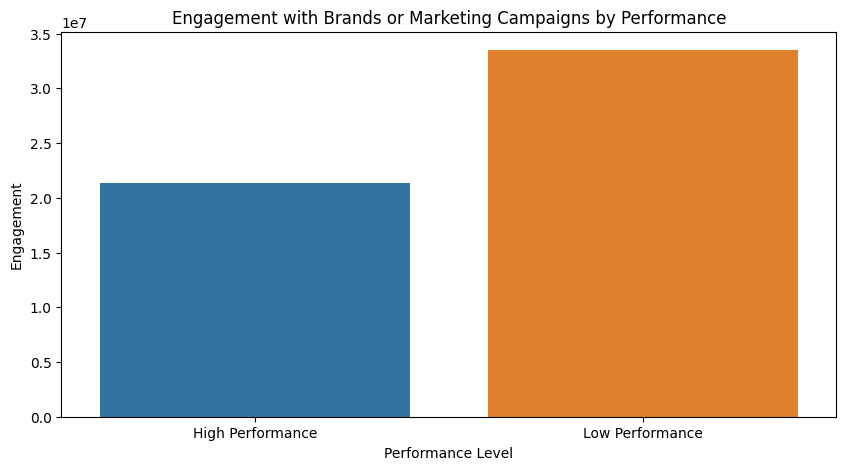

In [48]:
# Visualize the results:
plt.figure(figsize=(10, 5))
sns.barplot(x=['High Performance', 'Low Performance'], y=[high_performance_engagement, low_performance_engagement])
plt.title('Engagement with Brands or Marketing Campaigns by Performance')
plt.xlabel('Performance Level')
plt.ylabel('Engagement')
plt.show()

In [49]:
data.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,HighPerformance,Engagement
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,False,2778.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,True,5318500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,False,24700.0
3,4,SETIndia,Educación,162600000.0,India,15600.0,166.0,9.0,False,175.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,False,12400.0


**7.Benchmarking**
- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?

In [50]:
# Identify Top-Performing Streamers:
data['AboveAvgSubscribers'] = data['Suscribers'] > average_subscribers
data['AboveAvgVisits'] = data['Visits'] > average_visits
data['AboveAvgLikes'] = data['Likes'] > average_likes
data['AboveAvgComments'] = data['Comments'] > average_comments

In [51]:
# List the Top-Performing Content Creators:
top_performing_streamers = data[data['AboveAvgSubscribers'] & data['AboveAvgVisits'] & data['AboveAvgLikes'] & data['AboveAvgComments']]
print(top_performing_streamers)

     Rank               Username                     Categories   Suscribers  \
1       2                MrBeast             Videojuegos, Humor  183500000.0   
5       6              PewDiePie         Películas, Videojuegos  111500000.0   
26     27            dudeperfect                    Videojuegos   59700000.0   
34     35            TaylorSwift                 Música y baile   54100000.0   
39     40            JuegaGerman           Películas, Animación   48600000.0   
43     44               A4a4a4a4               Animación, Humor   47300000.0   
58     59              Mikecrack           Películas, Animación   43400000.0   
62     63         KimberlyLoaiza                 Música y baile   42100000.0   
64     65        luisitocomunica                 Música y baile   41100000.0   
70     71            JessNoLimit           Películas, Animación   39600000.0   
96     97         TotalGaming093         Películas, Videojuegos   36300000.0   
98     99   TechnoGamerzOfficial        

**8.Content Recommendations**
* Propose a system for enhancing content recommendations to YouTube users based on streamers categories and performance metrics.

In [52]:
# Create a user-item interaction matrix with content categories and performance metrics
user_item_matrix = data.pivot_table(index='Username', columns='Categories', values='Suscribers', fill_value=0)
user_item_matrix

Categories,ASMR,"ASMR, Comida y bebida",Animación,"Animación, Humor","Animación, Humor, Juguetes","Animación, Juguetes","Animación, Videojuegos",Animales y mascotas,"Belleza, Moda",Ciencia y tecnología,...,Películas,"Películas, Animación","Películas, Humor","Películas, Juguetes","Películas, Videojuegos","Viajes, Espectáculos",Videojuegos,"Videojuegos, Humor","Videojuegos, Juguetes",Vlogs diarios
Username,,,,,,,,,,,,,,,,,,,,,
-genevievesplayhouse1465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123GOSpanish,0,0,13900000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123GO_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1MILLION_Dance,0,0,0,0,0,0,0,0,0,0,...,0,0,26300000,0,0,0,0,0,0,0
1theK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeetv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeetvtelugu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zhong,0,0,31400000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Calculate cosine similarity between streamers based on the user-item matrix
cosine_sim = cosine_similarity(user_item_matrix)

In [54]:
# Define a function to get content recommendations based on a given streamer
def get_recommendations(username, cosine_sim=cosine_sim):
    idx = user_item_matrix.index.get_loc(username)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]  # Get the top 10 most similar streamers
    streamer_indices = [i[0] for i in sim_scores]
    return user_item_matrix.index[streamer_indices]

In [56]:
# Example usage: Get recommendations for a specific streamer
recommended_streamers = get_recommendations('zeetv')
print(recommended_streamers)

Index(['5MinuteCraftsDIY', '7clouds', 'ABPNEWS', 'AadishaktiFilms',
       'AdexeyNau', 'Akon', 'ArianaGrande', 'AvrilLavigne', 'BLACKPINK',
       'BS_Arabic', 'BTS', 'BillieEilish', 'BispoBrunoLeonardo',
       'BlackEyedPeas', 'BlippiEspanol', 'BollywoodClassics', 'CNCOMusic',
       'CalvinHarris', 'CalvinHarrisVEVO', 'ChainsmokersVEVO'],
      dtype='object', name='Username')
